# ImageDataGeneratorを用いたデータ拡張
https://keras.io/preprocessing/image/

In [2]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import glob
import matplotlib.pyplot as plt
from matplotlib import cm

Using TensorFlow backend.


## numpy形式の画像を拡張する場合

In [3]:
# 画像読み込み
data = np.load("/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/1_data/train_data.npy")  # パスは適宜変更すること
label = np.load("/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/1_data/train_label.npy")  # パスは適宜変更すること

dir_list = glob.glob("/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/2_notebook/output_*")
 
for rdir in dir_list:
    shutil.rmtree(rdir)

#print(label[0])
#print(label[1])
#print(label[2])
    
# 文字種毎にデータ抽出、データ拡張
for i in range(15):
    index = np.where(label[:, i] == 1)
#    print(index)
#    print(label[index])
    data_c = data[index[0]]
#    print(data_c.shape)

#    for j in range(200):
#        img = data_c[j,:,:,:,]
#        plt.imshow(img[0,:,:], cmap='gray')
#        plt.show()
    
    # 軸をN,H,W,Cに入れ替え
    data_c = data_c.transpose(0,2,3,1)


    # ImageDataGeneratorのオブジェクト生成
    datagen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            #height_shift_range=0.2,
            #width_shift_range=0.2,
            rotation_range=15)

    # 生成後枚数
    num_image = 4000
    
    save_path = "/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/2_notebook/output_%s/"%i
    os.mkdir(save_path)
    
    # 生成
    g = datagen.flow(data_c, batch_size=1, save_to_dir=save_path, save_format='png', save_prefix='out_a_from_npy_')
    for k in range(num_image):
        batches = g.next()

# 1種類目の文字を抽出
#index = np.where(label[:, 0] == 1)
#data_c = data[index[0]]
#print(data_c.shape)

# 軸をN,H,W,Cに入れ替え
#data = data.transpose(0,2,3,1)

## ImageDataGeneratorのオブジェクト生成
#datagen = ImageDataGenerator(
#        rescale=1./255,
#        shear_range=0.2,
#        zoom_range=0.2,
#        horizontal_flip=True)

# ImageDataGeneratorのオブジェクト生成
#datagen = ImageDataGenerator(
#        shear_range=0.2,
#        zoom_range=0.2,
#        rotation_range=15)

# 生成後枚数
#num_image = 10000

# 生成
#g = datagen.flow(data, batch_size=1, save_to_dir="/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/2_notebook/output/", save_format='png', save_prefix='out_a_from_npy_')
#for i in range(num_image):
#        batches = g.next()
        

# 拡張後の画像ファイルを配列に変換

In [4]:
import glob
from keras.preprocessing.image import load_img,img_to_array
from tqdm import tqdm

IMG_SIZE=28
#True=Grayscale, False=RGB
COLOR=True
#Name to save
SAVE_FILE_NAME='SaveImages'
#shape File Name
if COLOR:
    SAVE_FILE_NAME=SAVE_FILE_NAME+'_'+str(IMG_SIZE)+'Gray'
else:
    SAVE_FILE_NAME=SAVE_FILE_NAME+'_'+str(IMG_SIZE)+'RGB'

merge_array = np.empty([0,28,28,1])    

for l in range(15):
    
    #Name to load images Folder
    DIR_NAME='./output_%s'%l
    
    #load madomagi images and reshape
    img_list=glob.glob(DIR_NAME+'/*.png')
    temp_img_array_list=[]
    for img in tqdm(img_list):
        temp_img=load_img(img,grayscale=COLOR,target_size=(IMG_SIZE,IMG_SIZE))
        temp_img_array=img_to_array(temp_img)
        temp_img_array_list.append(temp_img_array)

    temp_img_array_list=np.array(temp_img_array_list)
    
    print(temp_img_array_list.shape)

    merge_array = np.concatenate([merge_array, temp_img_array_list])
    
    #save np.array
    #SAVE_ARFILE_NAME =  SAVE_FILE_NAME+"_%s"%l+'.npy'
    #np.save(SAVE_ARFILE_NAME,temp_img_array_list)

print(merge_array.shape)
merge_array = merge_array.transpose(0,3,1,2)
#SAVE_MR_ARFILE_NAME =  SAVE_FILE_NAME+"_MR"+'.npy'
np.save("train_data_mr.npy",merge_array)
    
#confirmation
#print(temp_img_array_list)
#print(temp_img_array_list.shape)

  0%|          | 0/3997 [00:00<?, ?it/s]/Users/hiranot/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
  5%|▌         | 218/3995 [00:00<00:01, 2179.13it/s]

(3997, 28, 28, 1)


  5%|▌         | 209/3993 [00:00<00:01, 2087.62it/s]

(3995, 28, 28, 1)


  5%|▌         | 212/3997 [00:00<00:01, 2111.79it/s]

(3993, 28, 28, 1)


  0%|          | 0/3999 [00:00<?, ?it/s]

(3997, 28, 28, 1)


100%|██████████| 3999/3999 [00:03<00:00, 1325.17it/s]


(3999, 28, 28, 1)


  0%|          | 0/3998 [00:00<?, ?it/s]

(3997, 28, 28, 1)


100%|██████████| 3998/3998 [00:02<00:00, 1353.33it/s]


(3998, 28, 28, 1)


  0%|          | 0/3997 [00:00<?, ?it/s]

(3998, 28, 28, 1)


100%|██████████| 3997/3997 [00:02<00:00, 1739.86it/s]


(3997, 28, 28, 1)


100%|██████████| 3996/3996 [00:02<00:00, 1408.93it/s]


(3996, 28, 28, 1)


100%|██████████| 3998/3998 [00:03<00:00, 1140.09it/s]


(3998, 28, 28, 1)


100%|██████████| 3994/3994 [00:03<00:00, 1133.22it/s]


(3994, 28, 28, 1)


100%|██████████| 3998/3998 [00:02<00:00, 1397.79it/s]


(3998, 28, 28, 1)


100%|██████████| 3997/3997 [00:03<00:00, 1325.51it/s]


(3997, 28, 28, 1)


100%|██████████| 3997/3997 [00:02<00:00, 1366.76it/s]


(3997, 28, 28, 1)
(59951, 28, 28, 1)


# アレイ型ファイルから画像データを読み込み、表示

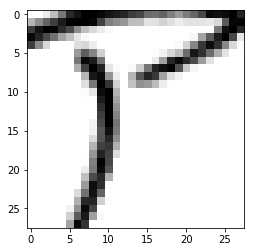

In [5]:
tmp_data = np.load("./SaveImages_28Gray_MR.npy")
#train_label = np.load("../1_data/train_label.npy")
#print(tmp_data.shape)
tmp_data = tmp_data.transpose(0,3,1,2)
#print(train_label.shape)

ind = 0

#print(tmp_data[0])
# 画像
img = tmp_data[ind,:,:,:,]
plt.imshow(img[0,:,:], cmap='gray')
plt.show()

# ラベル
#label_int = np.argmax(train_label [ind])
#for key, value in dic_katakana.items():
#    if value==label_int:
#        label_str = key
#        break

# 出力
#img = Image.fromarray(np.uint8(img.reshape(28,28)))
#img.save("%s.png"%label_str)


# 正解ラベル作成

In [6]:
label_count = []

for i in range(15):
    path = "/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/2_notebook/output_%s"%i
    files = os.listdir(path)  
    count = len(files)
    label_count.append(count)
    #print(label_count)  

char_a=np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
char_i=np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
char_u=np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
char_e=np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0])
char_o=np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])
char_ka=np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])
char_ki=np.array([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0])
char_ku=np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0])
char_ke=np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
char_ko=np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0])
char_sa=np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0])
char_si=np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0])
char_su=np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
char_se=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0])
char_so=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
                         
for i in range(15):
    if i == 0:
        array_a = np.tile(char_a,(label_count[i],1))
    if i == 1:
        array_i = np.tile(char_i,(label_count[i],1))
    if i == 2:
        array_u = np.tile(char_u,(label_count[i],1))
    if i == 3:
        array_e = np.tile(char_e,(label_count[i],1))
    if i == 4:
        array_o = np.tile(char_o,(label_count[i],1))
    if i == 5:
        array_ka = np.tile(char_ka,(label_count[i],1))
    if i == 6:
        array_ki = np.tile(char_ki,(label_count[i],1))
    if i == 7:
        array_ku = np.tile(char_ku,(label_count[i],1))
    if i == 8:
        array_ke = np.tile(char_ke,(label_count[i],1))
    if i == 9:
        array_ko = np.tile(char_ko,(label_count[i],1))
    if i == 10:
        array_sa = np.tile(char_sa,(label_count[i],1))
    if i == 11:
        array_si = np.tile(char_si,(label_count[i],1))
    if i == 12:
        array_su = np.tile(char_su,(label_count[i],1))
    if i == 13:
        array_se = np.tile(char_se,(label_count[i],1))
    if i == 14:
        array_so = np.tile(char_so,(label_count[i],1))

label_data_mr = np.concatenate([array_a, array_i, array_u, array_e, array_o, array_ka, array_ki, array_ku, array_ke, array_ko, array_sa, array_si, array_su, array_se, array_so])
#print(label_data_mr)

np.save("train_label_mr.npy",label_data_mr)
